# Grand Average Analysis- Full Study - 2020 edition

In this file we investigate the grand average of all subjets in the AALIS study with respect to the oddball effect. This analysis uses data from all of the usable subjects in the e-learn study.

_The results show:_
- Oscillitory activity seems to increase in P/O during mind wandering
- There is a possible Elevated P2 centered around Fz 

---

This notebook reads in the *-ave.fif evoked files from individual subjects that were produced by the individual subject preprocessing notebooks. 

Assumes that the data from each subject are in a sub-folder named for that subject, and that these subject sub-folders are in the same folder as this script.

---
Based on work by Aaron J Newman; Copyright (c) 2016 Aaron J Newman, NeuroCognitive Imaging Lab, Dalhousie University

This program is free software; you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation; either version 2 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this program; if not, write to the Free Software Foundation, Inc., 51 Franklin Street, Fifth Floor, Boston, MA 02110-1301, USA.

---

In [1]:
# This is an attempt to produce the results without repeating the analytical steps using the evokeds files.

%matplotlib inline
import matplotlib as plt
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300  
figsize=(4, 4)

import mne
import mne.stats
import numpy as np
mne.set_log_level('error')

data_path = '.'

subjects = [
    '01',
    '02',
    '03',
    '04',
    '05',
    '06',
    '07',
    '08',
    '09',
    '10', 
    '11',
    #participant 12 excluded from all analysis due to an unfixable technical error - amplifier recording error f 
    '13',
    '14', 
    '15',
    '16',
    '17',
    '18',
    '19',
    '20',
    '21',
    '22',
    '23',
    '24', 
    '25', 
    '26', 
    '27',
    '28',
    '29',
    '30',
    '31',
    '32',
    '33',
    '34',
    '35', 
    #participant 36 excluded from all analysis due to an unfixable technical error - amplifier recording error f 
    '37',
    '38',
    '39', 
    '40',
    '41', 
    '42',
    '43', 
    '44', 
    '45',
    #participant 46 excluded from all analysis due to an unfixable technical error - too many head movements f
    #participant 47 excluded from all analysis because of a technical error with mastoids m
    '48',
    '49',
    '50',
    '51',
    '52',
]

## Retrieve evokeds

In [2]:
evoked = {}
for subject in subjects:
    evoked[subject] = mne.read_evokeds(str(data_path + '/' + subject + '/eeg_recordings/' + 'aalis-' + subject + '-ave.fif'))

In [3]:
evoked['01'][4].nave

56

In [4]:
mw1sn = 0

for e in evoked:
    for f in evoked[e]:
        if f.comment == 'MW1/Oddball':
            mw1sn += f.nave
            
mw1sn

278

In [5]:
mw5sn = 0

for e in evoked:
    for f in evoked[e]:
        if f.comment == 'MW5/Oddball':
            mw5sn += f.nave
            
mw5sn

72

In [6]:
mw1sn

278

In [7]:
evoked['01'][0].comment

'Unlabelled/Standard'

## Create grand averages of each condition

In [8]:
gavg = {} # hold the gavg condition

# specify the conds
conds = [
    'Unlabelled/Standard',
    'Unlabelled/Oddball',
    'MW1/Standard',
    'MW2/Standard',
    'MW3/Standard',
    'MW4/Standard',
    'MW5/Standard',
    'MW1/Oddball',
    'MW2/Oddball',
    'MW3/Oddball',
    'MW4/Oddball',
    'MW5/Oddball'
] 

# for each cond save the respectie evokeds and then grand average
for cond in conds:
    c = [] #contain the evokeds
    for subj in subjects:
        for x in evoked[subj]:
            if x.comment == cond:
                c.append(x)
    gavg[cond] = mne.grand_average(c)
    
gavg_back = gavg

In [9]:
gavg

{'Unlabelled/Standard': <Evoked | 'Grand average (n = 48)' (average, N=48), -0.19922 – 1 sec, baseline off, 32 ch, ~205 kB>,
 'Unlabelled/Oddball': <Evoked | 'Grand average (n = 48)' (average, N=48), -0.19922 – 1 sec, baseline off, 32 ch, ~205 kB>,
 'MW1/Standard': <Evoked | 'Grand average (n = 35)' (average, N=35), -0.19922 – 1 sec, baseline off, 32 ch, ~205 kB>,
 'MW2/Standard': <Evoked | 'Grand average (n = 48)' (average, N=48), -0.19922 – 1 sec, baseline off, 32 ch, ~205 kB>,
 'MW3/Standard': <Evoked | 'Grand average (n = 43)' (average, N=43), -0.19922 – 1 sec, baseline off, 32 ch, ~205 kB>,
 'MW4/Standard': <Evoked | 'Grand average (n = 37)' (average, N=37), -0.19922 – 1 sec, baseline off, 32 ch, ~205 kB>,
 'MW5/Standard': <Evoked | 'Grand average (n = 15)' (average, N=15), -0.19922 – 1 sec, baseline off, 32 ch, ~205 kB>,
 'MW1/Oddball': <Evoked | 'Grand average (n = 35)' (average, N=35), -0.19922 – 1 sec, baseline off, 32 ch, ~205 kB>,
 'MW2/Oddball': <Evoked | 'Grand average (n 

## Topoplots

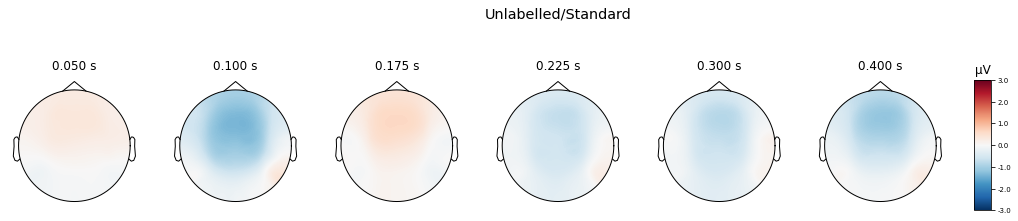

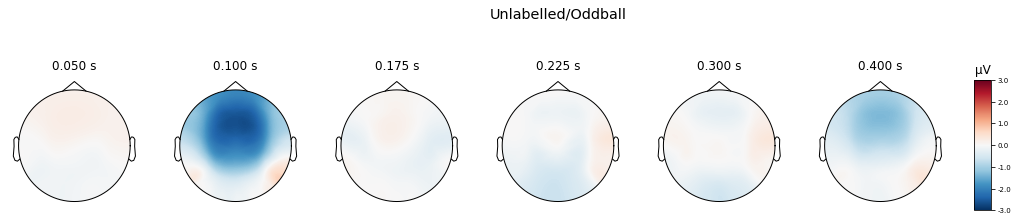

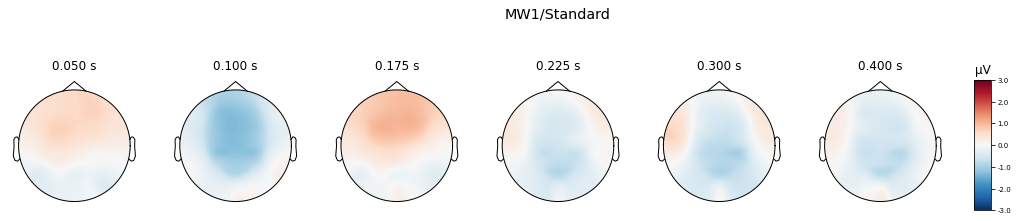

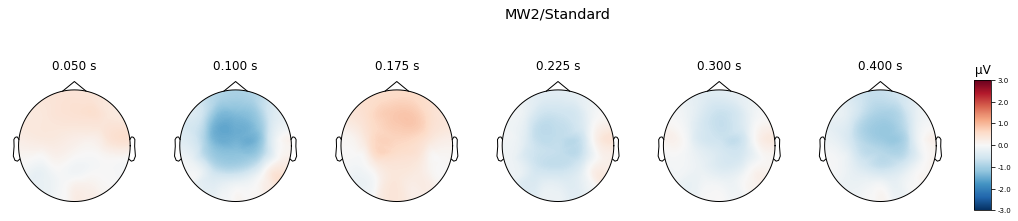

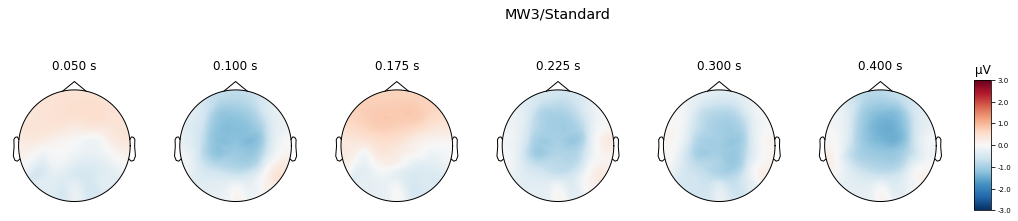

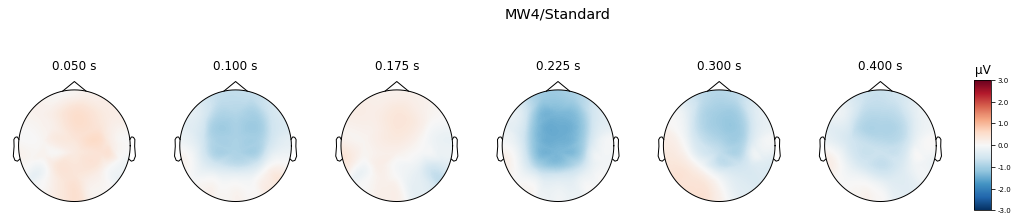

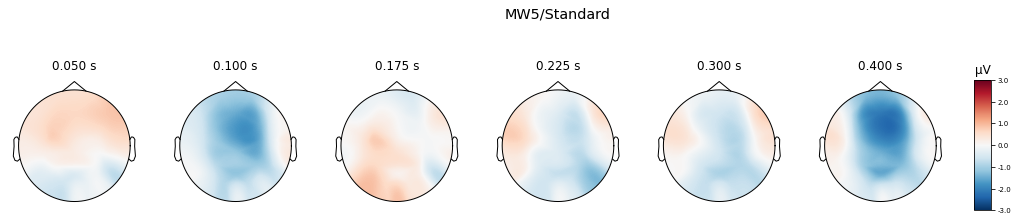

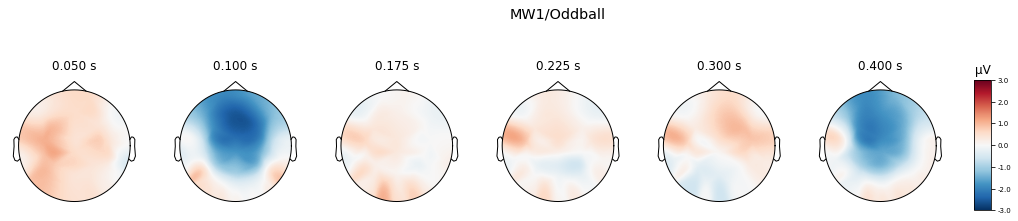

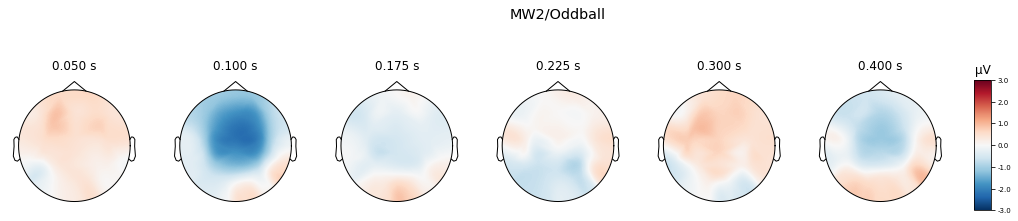

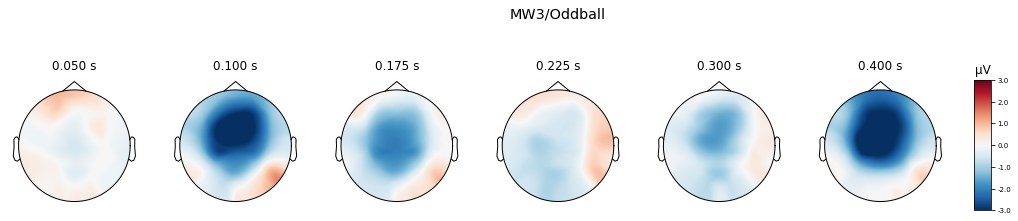

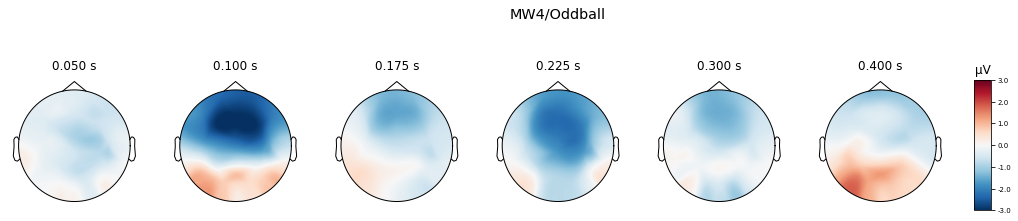

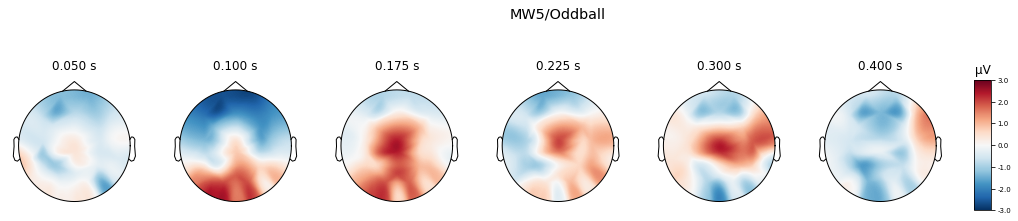

In [10]:
# these plots have the same vmin and vmax

%matplotlib inline

times = [0.05, 0.1, 0.175, 0.225, 0.3, 0.4] # change these as needed

for cond in gavg:
    [gavg[cond].plot_topomap(times=times, 
                             average=0.050,
                             ch_type='eeg', 
                             show_names=False, sensors=False, contours=False,
                             colorbar=True, 
                             title=cond, 
                             size=1.5, res=128, 
                             vmin=-3, 
                             vmax=3)];

## Difference plot
Note these are shaky because few participants reported both extremes.

In [11]:
#0 = MWO; 1 = OTO; 2 = OTS; 3 = MWS

contrasts = {'MW5S-MW1S':['MW5/Standard', 'MW1/Standard'],
             'MW5O-MW1O':['MW5/Oddball', 'MW1/Oddball']
            }

diff_standard = [] # array, not dict

for subject in subjects:
    for e in evoked[subject]:
        if e.comment == 'MW5/Standard':
            for f in evoked[subject]:
                if f.comment == 'MW1/Standard':
                    tmp = mne.combine_evoked([e, -f], weights='equal')
                    diff_standard.append(tmp)

diff_oddball = []
for subject in subjects:
    for e in evoked[subject]:
        if e.comment == 'MW5/Oddball':
            for f in evoked[subject]:
                if f.comment == 'MW1/Oddball':
                    tmp = mne.combine_evoked([e, -f], weights='equal')
                    diff_oddball.append(tmp)

### Create grand average differences 
Note: This is a small subset of the data, only participants who had both MW5 and MW1

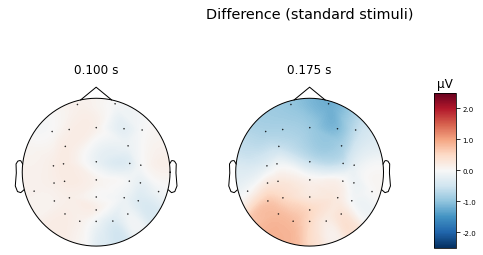

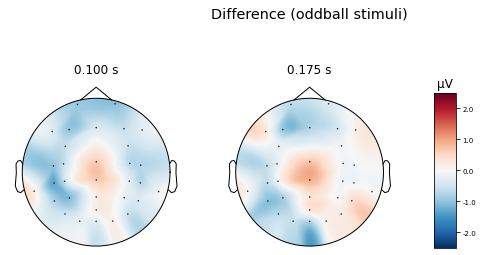

In [12]:
diff_gavg = {}

# times = [0.05, 0.1, 0.175, 0.225, 0.3, 0.4] # change these as needed

times = [0.100, 0.175]

diff_gavg['Standard'] = mne.grand_average(diff_standard)
diff_gavg['Oddball'] = mne.grand_average(diff_oddball)

std_gavg = diff_gavg['Standard'].plot_topomap(times=times ,
                              ch_type='eeg', 
                              vmin = -2.5,
                              vmax = 2.5,
                              show_names=False, 
                              average=0.050,
                              colorbar=True, sensors=True, contours=False, size=2, res=128, 
                              title=str('Difference (standard stimuli)'));

std_gavg.dpi = 160
std_gavg.savefig('gavg_std.png')

odd_gavg = diff_gavg['Oddball'].plot_topomap(times=times ,
                              ch_type='eeg', 
                              vmin = -2.5,
                              vmax = 2.5,
                              show_names=False, 
                              average=0.050,
                              colorbar=True, sensors=True, contours=False, size=2, res=128, 
                              title=str('Difference (oddball stimuli)'));

odd_gavg.dpi = 160
odd_gavg.savefig('gavg_odd.png')

# Contrasts between condition extremes centered around Pz
We can see clear differences in oscillatory activtiy though not necessarily peaks.

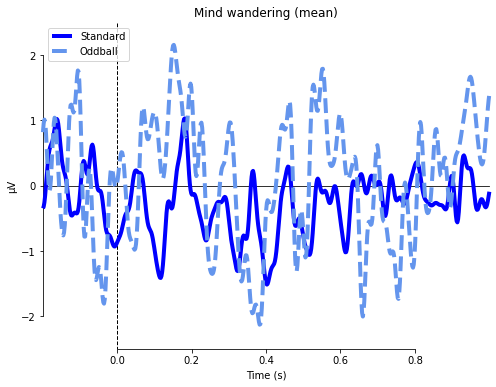

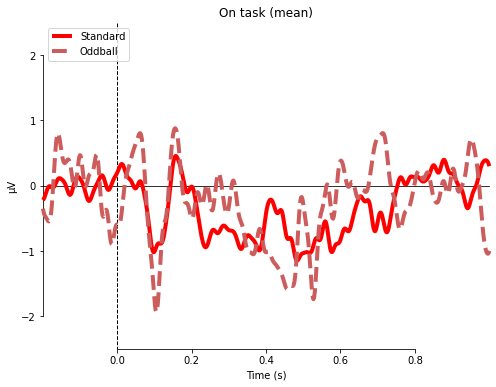

In [13]:
%matplotlib inline

picks = [gavg['MW5/Standard'].ch_names.index('Pz'), 
         gavg['MW5/Standard'].ch_names.index('P3'), 
         gavg['MW5/Standard'].ch_names.index('P4'), 
         gavg['MW5/Standard'].ch_names.index('Oz'), 
         gavg['MW5/Standard'].ch_names.index('CPz'),  #CP3
        ]

mw1s = gavg['MW1/Standard'] #.crop(-0.1,0.4)
mw1o = gavg['MW1/Oddball'] #.crop(-0.1,0.4)

mw5s = gavg['MW5/Standard'] #.crop(-0.1,0.4)
mw5o = gavg['MW5/Oddball'] #.crop(-0.1,0.4)

mw = {'Standard':mw5s, 'Oddball':mw5o}
ot = {'Standard':mw1s, 'Oddball':mw1o}

styles = {'Standard':{'linewidth':4},
          'Oddball':{'linewidth':4}
         }


mne.viz.plot_compare_evokeds(mw, 
                             picks=picks, 
                             ylim = dict(eeg=[-2.5, 2.5]), 
                             styles=styles, 
                             colors=['blue','cornflowerblue'],
                             linestyles=['-','--'],
                             title="Mind wandering",
                             combine='mean')

mne.viz.plot_compare_evokeds(ot, 
                             picks=picks, 
                             ylim = dict(eeg=[-2.5, 2.5]), 
                             styles=styles,
                             colors=['red','indianred'],
                             linestyles=['-','--'],
                             title="On task",
                             combine='mean');

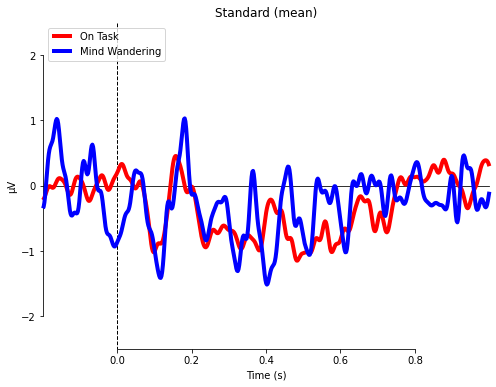

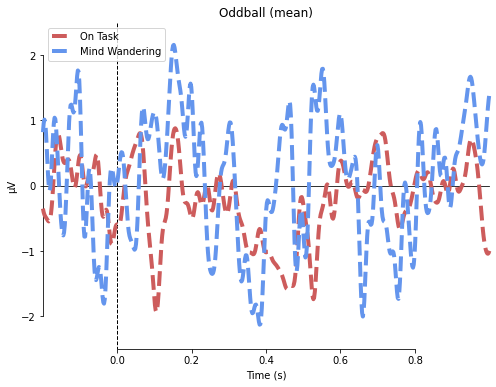

In [15]:
st = {'On Task':mw1s, 'Mind Wandering':mw5s}
ob = {'On Task':mw1o, 'Mind Wandering':mw5o}


styles = {'On Task':{'linewidth':4},
          'Mind Wandering':{'linewidth':4}
         }

mne.viz.plot_compare_evokeds(st, 
                             picks=picks, 
                             ylim = dict(eeg=[-2.5, 2.5]), 
                             styles=styles, 
                             colors=['red','blue'],
                             linestyles=['-','-'],
                             title="Standard",
                             combine='mean')

mne.viz.plot_compare_evokeds(ob, 
                             picks=picks, 
                             ylim = dict(eeg=[-2.5, 2.5]), 
                             styles=styles, 
                             colors=['indianred','cornflowerblue'],
                             linestyles=['--','--'],
                             title="Oddball",
                             combine='mean');

# Contrasts between condition extremes centered around Fz
There appear to be differences between the P2 centered around Fz. There are some challenges with the baseline, so these are re-referenced here.

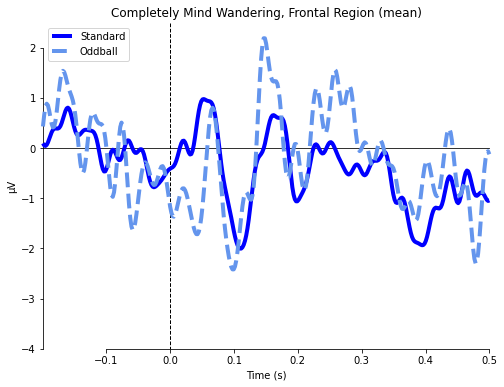

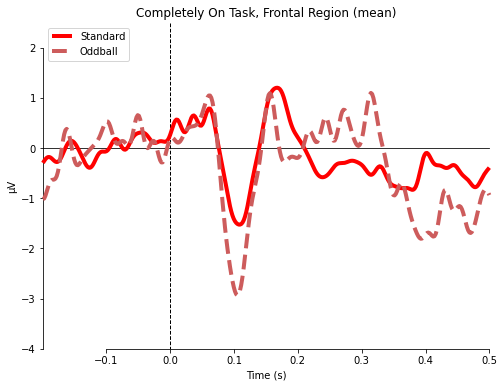

In [14]:
%matplotlib inline

picks = [gavg['MW5/Standard'].ch_names.index('Fz'), 
         gavg['MW5/Standard'].ch_names.index('F3'), 
         gavg['MW5/Standard'].ch_names.index('F4'),
         gavg['MW5/Standard'].ch_names.index('FC3'), 
         gavg['MW5/Standard'].ch_names.index('FC4'), 
         gavg['MW5/Standard'].ch_names.index('Cz'), 
         gavg['MW5/Standard'].ch_names.index('C3'), 
         gavg['MW5/Standard'].ch_names.index('C4'), 
        ]

baseline = (-0.2,0)

mw1s = gavg['MW1/Standard']
mw1s.data = mne.baseline.rescale(gavg['MW1/Standard'].data, times=gavg['MW1/Standard'].times, baseline=baseline)
mw1s = mw1s.crop(-0.2,0.5)

mw1o = gavg['MW1/Oddball']
mw1o.data = mne.baseline.rescale(gavg['MW1/Oddball'].data, times=gavg['MW1/Oddball'].times, baseline=baseline)
mw1o = mw1o.crop(-0.2,0.5)

mw5s = gavg['MW5/Standard']
mw5s.data = mne.baseline.rescale(gavg['MW5/Standard'].data, times=gavg['MW5/Standard'].times, baseline=baseline)
mw5s = mw5s.crop(-0.2,0.5)

mw5o = gavg['MW5/Oddball']
mw5o.data = mne.baseline.rescale(gavg['MW5/Oddball'].data, times=gavg['MW5/Oddball'].times, baseline=baseline)
mw5o = mw5o.crop(-0.2,0.5)


mw = {'Standard':mw5s, 'Oddball':mw5o}
ot = {'Standard':mw1s, 'Oddball':mw1o}

styles = {'Standard':{'linewidth':4},
          'Oddball':{'linewidth':4}
         }


mw_form = mne.viz.plot_compare_evokeds(mw, 
                             picks=picks, 
                             ylim = dict(eeg=[-4, 2.5]), 
                             styles=styles, 
                             colors=['blue','cornflowerblue'],
                             linestyles=['-','--'],
                             title="Completely Mind Wandering, Frontal Region",
                             combine='mean')

mw_form[0].dpi = 128
mw_form[0].savefig('wave_mw.png')

ot_form = mne.viz.plot_compare_evokeds(ot, 
                             picks=picks, 
                             ylim = dict(eeg=[-4, 2.5]), 
                             styles=styles,
                             colors=['red','indianred'],
                             linestyles=['-','--'],
                             title="Completely On Task, Frontal Region",
                             combine='mean');

ot_form[0].dpi = 128
ot_form[0].savefig('wave_ot.png')

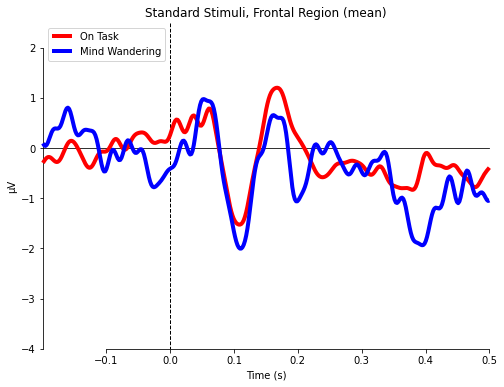

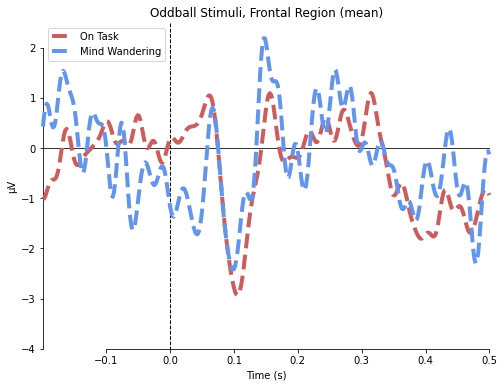

In [17]:
st = {'On Task':mw1s, 'Mind Wandering':mw5s}
ob = {'On Task':mw1o, 'Mind Wandering':mw5o}

styles = {'On Task':{'linewidth':4},
          'Mind Wandering':{'linewidth':4}
         }

std_form = mne.viz.plot_compare_evokeds(st, 
                             picks=picks, 
                             ylim = dict(eeg=[-4, 2.5]), 
                             styles=styles, 
                             colors=['red','blue'],
                             linestyles=['-','-'],
                             title="Standard Stimuli, Frontal Region",
                             combine='mean')

std_form[0].dpi = 128
std_form[0].savefig('wave_standard.png')

ob_form = mne.viz.plot_compare_evokeds(ob, 
                             picks=picks, 
                             ylim = dict(eeg=[-4, 2.5]), 
                             styles=styles, 
                             colors=['indianred','cornflowerblue'],
                             linestyles=['--','--'],
                             title="Oddball Stimuli, Frontal Region",
                             combine='mean');

ob_form[0].dpi = 128
ob_form[0].savefig('wave_oddball.png')

## Differences in one graph

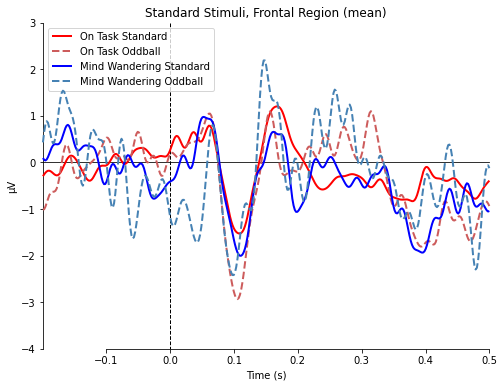

In [15]:
st = {'On Task Standard':mw1s, 'On Task Oddball': mw1o, 'Mind Wandering Standard':mw5s, 'Mind Wandering Oddball':mw5o}

styles = {'On Task Standard':{'linewidth':2},
          'On Task Oddball':{'linewidth':2},
          'Mind Wandering Standard':{'linewidth':2},
          'Mind Wandering Oddball':{'linewidth':2}
         }

std_form = mne.viz.plot_compare_evokeds(st, 
                             picks=picks, 
                             ylim = dict(eeg=[-4, 3]), 
                             styles=styles, 
                             colors=['red','indianred','blue','steelblue'],
                             linestyles=['-','--','-','--'],
                             title="Standard Stimuli, Frontal Region",
                             combine='mean')

std_form[0].dpi = 300
std_form[0].savefig('wave_all.png')